In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from scipy.ndimage import gaussian_filter

In [34]:
ts_df = pd.read_csv('../data/eyetracking_data/simonPilotResults/timeseries/delayGaze_ts.csv')

In [35]:
ts_df

,Unnamed: 0,axis,TRIALID,2000,2001,2002,2003,2004,2005,2006,...,3991,3992,3993,3994,3995,3996,3997,3998,3999,stimImage
0,0,x,"('111', 0, 0)",933.981818,934.054545,934.127273,934.200000,934.272727,934.345455,934.318182,...,951.509091,951.518182,951.518182,951.490909,951.363636,951.254545,951.145455,950.936364,950.718182,crayon_12s.jpg
1,1,x,"('111', 0, 1)",990.881818,991.981818,993.445455,995.472727,998.000000,1000.736364,1003.845455,...,1000.490909,1000.381818,1000.263636,1000.090909,999.945455,999.936364,999.990909,1000.145455,1000.290909,extinguisher_11s.jpg
2,2,x,"('111', 0, 10)",923.054545,923.900000,924.727273,925.672727,926.618182,926.600000,925.936364,...,981.400000,981.400000,981.400000,981.400000,981.400000,981.400000,981.400000,981.400000,981.400000,alligator_01b.jpg
3,3,x,"('111', 0, 11)",950.354545,950.181818,949.963636,949.781818,949.763636,949.836364,949.936364,...,961.990909,961.936364,961.927273,961.936364,961.936364,961.945455,962.045455,962.100000,962.118182,butterfly_01b.jpg
4,4,x,"('111', 0, 12)",909.427273,908.954545,908.527273,908.100000,907.527273,907.436364,908.054545,...,931.200000,931.200000,931.200000,931.200000,931.200000,931.200000,931.200000,931.200000,931.200000,alligator_14n.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,1163,y,"('222', 9, 5)",477.277273,477.027273,476.809091,476.845455,476.736364,476.518182,476.613636,...,532.027273,532.522727,532.863636,533.186364,533.481818,533.859091,534.218182,534.513636,534.436364,bamboo_03s.jpg
1164,1164,y,"('222', 9, 6)",541.009091,540.931818,540.881818,540.736364,540.540909,540.363636,540.290909,...,539.677273,539.381818,539.081818,538.790909,538.518182,538.290909,538.054545,537.868182,537.863636,brownie_08s.jpg
1165,1165,y,"('222', 9, 7)",515.481818,515.431818,515.404545,515.400000,515.309091,515.072727,514.963636,...,511.845455,511.904545,512.059091,512.213636,512.418182,512.636364,512.863636,513.100000,513.540909,monkey_12s.jpg
1166,1166,y,"('222', 9, 8)",465.754545,465.495455,465.554545,465.581818,465.427273,465.368182,465.318182,...,504.840909,504.581818,504.413636,504.254545,504.213636,504.181818,504.477273,504.818182,505.118182,taillight_05s.jpg


In [37]:
stim_ts = np.zeros((2, 584, 2000))
stim_ts[0] = ts_df.to_numpy()[:584, 3:-1]
stim_ts[1] = ts_df.to_numpy()[584:, 3:-1]
stim_ts = stim_ts.transpose(1, 0, 2)
stim_ts.shape

(584, 2, 2000)

In [38]:
np.save('../data/eyetracking_data/simonPilotResults/stim_ts_delay.npy', stim_ts)

In [42]:
# run split first
np.save('../data/eyetracking_data/simonPilotResults/train_ts_delay.npy', train_ts)
np.save('../data/eyetracking_data/simonPilotResults/test_ts_delay.npy', test_ts)

In [48]:
ts_df = pd.read_csv('../data/eyetracking_data/simonPilotResults/timeseries/stimGaze_ts.csv')
hm_df = pd.read_csv('../data/eyetracking_data/simonPilotResults/heatmaps/stimGaze_hm.csv')

In [49]:
ts_df

,Unnamed: 0,axis,TRIALID,1000,1001,1002,1003,1004,1005,1006,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,stimImage
0,0,x,"('111', 0, 0)",949.727273,949.663636,949.600000,949.545455,949.354545,949.372727,949.381818,...,934.309091,934.327273,934.354545,934.318182,934.245455,934.154545,934.045455,933.936364,933.909091,crayon_12s.jpg
1,1,x,"('111', 0, 1)",963.590909,963.563636,963.572727,963.581818,963.554545,963.527273,963.490909,...,990.127273,990.000000,989.845455,989.800000,989.900000,990.036364,990.090909,990.090909,990.363636,extinguisher_11s.jpg
2,2,x,"('111', 0, 10)",970.900000,970.900000,970.900000,970.900000,970.900000,970.900000,970.900000,...,929.772727,928.581818,927.327273,927.036364,927.109091,926.981818,925.609091,924.318182,923.181818,alligator_01b.jpg
3,3,x,"('111', 0, 11)",948.236364,948.309091,948.354545,948.390909,948.363636,948.300000,948.263636,...,950.563636,950.863636,950.990909,950.972727,950.781818,950.590909,950.445455,950.363636,950.381818,butterfly_01b.jpg
4,4,x,"('111', 0, 12)",960.800000,960.800000,960.800000,960.800000,960.800000,960.800000,960.800000,...,904.990909,905.609091,906.809091,907.854545,908.663636,909.472727,910.272727,910.227273,910.181818,alligator_14n.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,1163,y,"('222', 9, 5)",526.040909,526.100000,526.159091,526.136364,526.104545,526.118182,526.072727,...,478.940909,478.945455,478.809091,478.550000,478.077273,477.831818,477.736364,477.522727,477.286364,bamboo_03s.jpg
1164,1164,y,"('222', 9, 6)",527.050000,527.013636,527.018182,527.059091,527.068182,527.081818,527.127273,...,541.813636,541.681818,541.568182,541.454545,541.422727,541.304545,541.336364,541.381818,541.218182,brownie_08s.jpg
1165,1165,y,"('222', 9, 7)",517.622727,517.690909,517.700000,517.713636,517.713636,517.759091,517.836364,...,514.677273,514.695455,514.759091,514.927273,515.036364,515.168182,515.213636,515.109091,515.281818,monkey_12s.jpg
1166,1166,y,"('222', 9, 8)",504.695455,504.722727,504.772727,504.659091,504.540909,504.404545,504.372727,...,465.745455,465.645455,465.500000,465.440909,465.595455,465.809091,466.127273,466.159091,465.954545,taillight_05s.jpg


In [50]:
stim_ts = np.zeros((2, 584, 1000))
stim_ts[0] = ts_df.to_numpy()[:584, 3:-1]
stim_ts[1] = ts_df.to_numpy()[584:, 3:-1]
stim_ts = stim_ts.transpose(1, 0, 2)
stim_ts.shape

(584, 2, 1000)

In [51]:
np.save('../data/eyetracking_data/simonPilotResults/stim_ts.npy', stim_ts)

In [47]:
file_names = ts_df['stimImage'].to_numpy()[:584]

In [14]:
'_'.join(file_names[0].split('_')[:-1])

'crayon'

In [18]:
stim_concepts_ts = np.array(['_'.join(name.split('_')[:-1]) for name in file_names])
np.save('../data/eyetracking_data/simonPilotResults/stim_concepts_ts.npy', stim_concepts_ts)

In [28]:
ts_image_path = np.core.defchararray.add(stim_concepts_ts , np.array( ['/'] * 584 )) + file_names


In [29]:
stim_img_ts = np.zeros((stim_ts.shape[0], 540, 540, 3))
for i, path in enumerate(ts_image_path):
    img = Image.open('../data/eyetracking_data/eyetracking_images_fullset/' + path).resize((540, 540))
    stim_img_ts[i] = np.array(img.convert('RGB'))
np.save('../data/eyetracking_data/simonPilotResults/stim_img_ts.npy', stim_img_ts)

In [52]:
train_ts, test_ts, train_img_ts, test_img_ts, train_concepts_ts, test_concepts_ts  = train_test_split(stim_ts, stim_img_ts, stim_concepts_ts, test_size=0.2, random_state=66)

In [31]:
len(train_ts), len(test_ts), len(train_img_ts), len(test_img_ts), len(train_concepts_ts), len(test_concepts_ts)

(467, 117, 467, 117, 467, 117)

In [54]:
np.save('../data/eyetracking_data/simonPilotResults/train_ts.npy', train_ts)
np.save('../data/eyetracking_data/simonPilotResults/test_ts.npy', test_ts)

In [32]:
np.save('../data/eyetracking_data/simonPilotResults/train_ts.npy', train_ts)
np.save('../data/eyetracking_data/simonPilotResults/test_ts.npy', test_ts)
np.save('../data/eyetracking_data/simonPilotResults/train_img_ts.npy', train_img_ts)
np.save('../data/eyetracking_data/simonPilotResults/test_img_ts.npy', test_img_ts)
np.save('../data/eyetracking_data/simonPilotResults/train_concepts_ts.npy', train_concepts_ts)
np.save('../data/eyetracking_data/simonPilotResults/test_concepts_ts.npy', test_concepts_ts)

In [4]:
ts_df.iloc[583]

Unnamed: 0               583
axis                       x
TRIALID        ('222', 9, 9)
1000             1010.740909
1001             1010.613636
                   ...      
1996             1047.218182
1997             1047.172727
1998             1047.122727
1999             1047.095455
stimImage     kimono_02s.jpg
Name: 583, Length: 1004, dtype: object

In [7]:
stim_ts.dtype

dtype('float64')

In [79]:
ts_df.to_numpy()[0, 3:-1]

array([949.7272727272727, 949.6636363636364, 949.6, 949.5454545454544,
       949.3545454545456, 949.3727272727272, 949.381818181818,
       949.2545454545452, 949.2363636363636, 949.2272727272727,
       949.2454545454544, 949.318181818182, 949.4727272727272,
       949.6181818181816, 949.7545454545452, 950.018181818182,
       950.2636363636364, 950.518181818182, 950.7727272727273, 950.9,
       951.018181818182, 951.0727272727272, 951.0272727272728,
       950.9090909090908, 950.8, 950.7, 950.8, 950.9454545454544,
       951.0909090909092, 951.2818181818184, 951.4727272727272,
       951.6454545454544, 951.881818181818, 952.1181818181816,
       952.3090909090909, 952.4909090909092, 952.6636363636364,
       952.6090909090908, 952.5363636363636, 952.4727272727272,
       952.3636363636364, 952.2545454545452, 952.1181818181816,
       951.9363636363636, 951.7545454545452, 951.618181818182,
       951.4090909090908, 951.218181818182, 951.0636363636364,
       950.8636363636364, 950.71

In [15]:
hm_df

,Unnamed: 0,imageName,normalizedHeatMap,imagePath
0,0,crayon_12s.jpg,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,crayon/crayon_12s.jpg
1,1,hippopotamus_09s.jpg,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,hippopotamus/hippopotamus_09s.jpg
2,2,padlock_04n.jpg,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,padlock/padlock_04n.jpg
3,3,screwdriver_04s.jpg,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,screwdriver/screwdriver_04s.jpg
4,4,screwdriver_12s.jpg,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,screwdriver/screwdriver_12s.jpg
...,...,...,...,...
141,141,typewriter_11s.jpg,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,typewriter/typewriter_11s.jpg
142,142,shredder_01b.jpg,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,shredder/shredder_01b.jpg
143,143,typewriter_13s.jpg,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,typewriter/typewriter_13s.jpg
144,144,easel_15s.jpg,[[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0....,easel/easel_15s.jpg


In [16]:
hm_image_path = hm_df['imagePath'].to_numpy(dtype=str)

In [17]:
np.save('../data/eyetracking_data/simonPilotResults/hm_image_path.npy', hm_image_path)

In [4]:
stim_hm = np.load('../data/eyetracking_data/simonPilotResults/stimGaze_hm.npy')
stim_hm.shape

(146, 540, 540)

In [59]:
train_hm = np.load('../data/eyetracking_data/simonPilotResults/train_hm.npy')
test_hm = np.load('../data/eyetracking_data/simonPilotResults/test_hm.npy')

In [11]:
np.isnan(train_hm).sum(), np.isnan(test_hm).sum()

(0, 0)

In [30]:
# plt.imshow(stim_hm[7])

In [34]:
stim_img = np.zeros((stim_hm.shape[0], 540, 540, 3))
for i, path in enumerate(hm_image_path):
    img = Image.open('../data/eyetracking_data/eyetracking_images_fullset/' + path).resize((540, 540))
    stim_img[i] = np.array(img.convert('RGB'))
np.save('../data/eyetracking_data/simonPilotResults/stim_img.npy', stim_img)

In [42]:
stim_concepts = np.array([path.split('/')[0] for path in hm_image_path])
np.save('../data/eyetracking_data/simonPilotResults/stim_concepts.npy', stim_concepts)

In [43]:
train_hm, test_hm, train_img, test_img, train_concepts, test_concepts  = train_test_split(stim_hm, stim_img, stim_concepts, test_size=0.2, random_state=42)

In [44]:
len(train_hm), len(test_hm), len(train_img), len(test_img), len(train_concepts), len(test_concepts)

(116, 30, 116, 30, 116, 30)

In [45]:
np.save('../data/eyetracking_data/simonPilotResults/train_hm.npy', train_hm)
np.save('../data/eyetracking_data/simonPilotResults/test_hm.npy', test_hm)
np.save('../data/eyetracking_data/simonPilotResults/train_img.npy', train_img)
np.save('../data/eyetracking_data/simonPilotResults/test_img.npy', test_img)
np.save('../data/eyetracking_data/simonPilotResults/train_concepts.npy', train_concepts)
np.save('../data/eyetracking_data/simonPilotResults/test_concepts.npy', test_concepts)

In [31]:
train_path = '../data/eyetracking_data/simonPilotResults/train_hm.npy'
train_hm = np.load(train_path, mmap_mode='r')
train_hm.shape

(116, 540, 540)

In [32]:
test_path = '../data/eyetracking_data/simonPilotResults/test_hm.npy'
test_hm = np.load(test_path, mmap_mode='r')
test_hm.shape

(30, 540, 540)

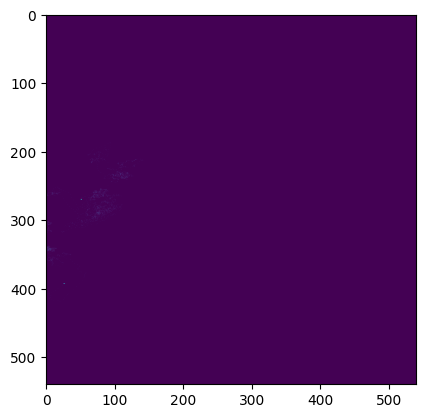

In [25]:
plt.imshow(train_hm[0])

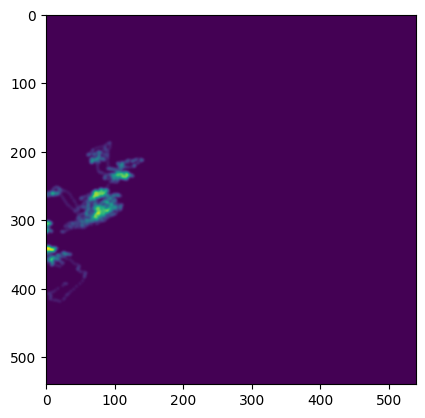

In [65]:
mask = train_hm[0] != 0
hm_filt = gaussian_filter(mask.astype(float), sigma=2e0)
# hm_filt = gaussian_filter(train_hm[0] * 1e20, sigma=0.1) * 1e20
plt.imshow(hm_filt)

18225


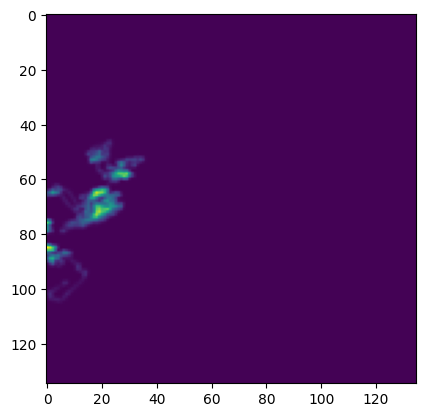

In [66]:
# Convert numpy array to PIL image
image = Image.fromarray(hm_filt)

# Downscale the image (e.g., to half its size)
image_resized = image.resize((image.width // 4, image.height // 4))

# Convert the image back to a numpy array
hm_filt_resized = np.array(image_resized)

plt.imshow(hm_filt_resized)
print(hm_filt_resized.shape[0] * hm_filt_resized.shape[1])

In [71]:
down_sizing_factor = 4
train_hm_filt_resized = np.zeros((train_hm.shape[0], train_hm.shape[1] // down_sizing_factor, train_hm.shape[2] // down_sizing_factor))
for i in range(len(train_hm)):
    mask = train_hm[i] != 0
    hm_filt = gaussian_filter(mask.astype(float), sigma=1e-1)
    image = Image.fromarray(hm_filt)
    image_resized = image.resize((image.width // down_sizing_factor, image.height // down_sizing_factor))
    hm_filt_resized = np.array(image_resized)
    train_hm_filt_resized[i] = hm_filt_resized

In [72]:
np.save('../data/eyetracking_data/simonPilotResults/train_hm_filt_resized.npy', train_hm_filt_resized)

In [73]:
test_hm_filt_resized = np.zeros((test_hm.shape[0], test_hm.shape[1] // down_sizing_factor, test_hm.shape[2] // down_sizing_factor))
for i in range(len(test_hm)):
    mask = test_hm[i] != 0
    hm_filt = gaussian_filter(mask.astype(float), sigma=1e-1)
    image = Image.fromarray(hm_filt)
    image_resized = image.resize((image.width // down_sizing_factor, image.height // down_sizing_factor))
    hm_filt_resized = np.array(image_resized)
    test_hm_filt_resized[i] = hm_filt_resized

In [74]:
np.save('../data/eyetracking_data/simonPilotResults/test_hm_filt_resized.npy', test_hm_filt_resized)

In [30]:
train_hm = train_hm.reshape(train_hm.shape[0], -1)
train_hm.shape

(116, 291600)

In [11]:
norm_mean_train = np.mean(train_hm, axis=0)
norm_scale_train = np.std(train_hm, axis=0, ddof=1)
norm_mean_train.shape, norm_scale_train.shape

((291600,), (291600,))

In [2]:
# plt.hist(norm_mean_train, bins=100);
# norm_mean_train.max(axis=1), norm_mean_train.min(axis=1)